# Assignment: Multi-container knapsack

### Name: VIKRANT SINGH JAMWAL
### Student ID: 23104534

### Problem statement

We have 3 trucks: 0, 1 and 2.

We have 30 items, and each item can either be placed on a particular truck, or not placed on any truck.

Each item has a value and a weight.

We want to maximise the total value of the items we place on the trucks.

But each truck has its own weight limit, so for each truck we have to obey the limit on its weight.

Your task is to solve this problem, comparing multiple algorithms / algorithmic ideas, and variants, and multiple hyperparameter values where appropriate, and report on your results.

### Measuring performance

I provide an objective function which (a) checks whether the weight limits are obeyed, and if yes it returns the sum of values achieved. Otherwise it returns 0. In this objective function, the solution is specified as a bitstring. We think of it in chunks of 3, one chunk for each item. If a chunk is `100`, for example, it means that the item is in truck 0. `001` means it's in truck 2. If there's no 0 in the chunk, it means the item is not placed on any truck. If there's more than 1 `1` in the chunk, eg `110`, it means the solution is invalid, and again we return 0.

For example, with 5 items and 3 trucks, the following would be a valid bitstring for my objective function.

`001 100 001 010 000`

I also provide a function to print a solution in a condensed format like the above.

### Experiments

You are free to use any metaheuristic algorithms, including HC, SA, GA, and/or any variant. You are free to use any encoding, which could be a bitstring encoding or something else; a genotype-phenotype mapping, a repair mechanism, or similar; and/or custom `init`, `nbr`, and/or `crossover` operators. You are free to use a different objective function **during the run**, but remember that you must use my objective function for the **final evaluation**, for fair comparison of all methods. You are free to use ideas which you or others have suggested in class to improve the algorithms.

For each setup, you should run the setup 5 times with random seeds 0, 1, 2, 3, 4, and compare the mean performance.

If you wish, you can show curves to demonstrate behaviour, such as objective over time, or diversity over time.

### Due date

As announced on Canvas.

### Grading

This assignment is worth 30% of the module. 

Marks will be awarded for:

* A comprehensive and well-designed experiment;
* Novel / interesting / well-motivated algorithmic ideas;
* Good results.

Your report should be written in an `ipynb` file including all your code, results, any necessary graphics and tables, and description. You should include a clear and short description of (a) the standard algorithms you are using; (b) your novel algorithmic ideas; and (c) the results. As a guideline, I recommend 1000-3000 words of text, and 100-300 lines of code (in addition to the code provided). These are not hard limits.

### Teams

You may work solo, or in a team of 2. If in a team of 2, both students must submit and their submissions must be identical. You may not work together with a student you previously worked with in any other assignment in any other module. To work in a team, one team member must send email to the lecturer at least 2 weeks before the deadline including both members' names and ID numbers, cc-ing the other team member. If you work in a team, both members have to work together on all aspects of the problem: you cannot divide it up between you.

### Reusing code; plagiarism; interviews; work-in-progress

You may import libraries if they can be directly installed using Anaconda or pip. 

You may not use substantial amounts of code from the internet, but short snippets are allowed, with citation (URL in a comment to show exactly what code was used). 

You may discuss work with others, but you may not look at work by others or show your work to others. 

You may not use generated code.

After submission, we will hold very short interviews. Where a student or team cannot answer questions about their own work at interview, it will be taken as evidence of plagiarism of some form.

You should show me your work in progress during labs, and tell me in particular what standard and non-standard algorithmic ideas you plan to use, and tell me if you are working in a team. Where a student shows good understanding of their own work in progress during labs they may not need to come to interview.

In [45]:
# 30 items, each with a weight and a value: (wt, val)
items = [(7, 70), (13, 25), (20, 50), (4, 38), (10, 48), (4, 72), (1, 12), (5, 30), (19, 21), (1, 99), 
         (8, 87), (14, 31), (19, 10), (10, 67), (19, 12), (11, 50), (8, 13), (3, 68), (12, 50), (13, 41), 
         (1, 67), (8, 98), (5, 28), (3, 15), (17, 78), (13, 83), (2, 25), (14, 79), (6, 48), (20, 49)]

In [46]:
def objective_function(x):
    total_value = 0
    container_weights = [0, 0, 0]
    # truck weight limits
    weight_limits = [72, 80, 109]
    
    for i, (wt, val) in enumerate(items):
        chunk = x[i*3 : i*3+3]
        
        if sum(chunk) > 1:
            return 0 # can't place item in more than truck
        if sum(chunk) == 0:
            continue # this item is not chosen
        # Find which container this item is allocated to: 0, 1 or 2
        idx = chunk.index(1)
        
        # Place the item in the container
        container_weights[idx] += wt
        if container_weights[idx] > weight_limits[idx]:
            return 0 # over-weight
        total_value += val
    
    return total_value

# useful for printing in a condensed format
def print_sol(x):
    for i in range(len(x) // 3):
        chunk = x[i*3 : i*3+3]
        for j in chunk:
            print(j, end="")
        print(" ", end="")
    print("")

Below is a short test / demo:

In [47]:

# 1,1,0 for item 0 is invalid
bad_solution1 = [1,1,0, 0,0,0, 0,0,0, 0,0,1, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 1,0,0, 0,0,0, 
                 0,0,0, 0,0,1, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,1,0, 0,0,0, 
                 0,0,0, 0,0,0, 0,0,0, 1,0,0, 0,1,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0]

# over-weight for truck 0
bad_solution2 = [1,0,0, 1,0,0, 1,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 
                 1,0,0, 1,0,0, 1,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 
                 1,0,0, 1,0,0, 1,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0]
# ok
good_solution = [0,0,0, 0,0,0, 0,0,0, 0,0,1, 0,0,0, 1,0,0, 0,0,0, 0,0,0, 1,0,0, 0,0,0, 
                 0,1,0, 0,0,1, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,0,0, 0,1,0, 0,0,0, 
                 0,0,1, 1,0,0, 0,0,0, 1,0,0, 0,1,0, 0,0,0, 0,0,0, 0,0,1, 0,0,0, 0,0,0]
for sol in [bad_solution1, bad_solution2, good_solution]:
    print(f"The total value for the solution")
    print_sol(sol)
    print(f"is {objective_function(sol)}.")



The total value for the solution
110 000 000 001 000 000 000 000 100 000 000 001 000 000 000 000 000 000 010 000 000 000 000 100 010 000 000 000 000 000 
is 0.
The total value for the solution
100 100 100 000 000 000 000 000 000 000 100 100 100 000 000 000 000 000 000 000 100 100 100 000 000 000 000 000 000 000 
is 0.
The total value for the solution
000 000 000 001 000 100 000 000 100 000 010 001 000 000 000 000 000 000 010 000 001 100 000 100 010 000 000 001 000 000 
is 636.


In [48]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Introduction

The objective is to maximise the total value of items placed on the trucks. This report is written in following steps:
* Initialization
* Neighbors
* Simple Hill climbing
* Simulated Anealing
    * with alpha = 0.999
    * with alpha = 0.99
    * with alpha = 0.9
* Genetic Algorithm
    * Uniform Crossover
    * One Point Crossover
    * Two Point Crossover
* Performance Results
* Conclusion
* **Idea** and its performance

<H2>Initialization</H2>

For this particular case, initialization can be done in following steps:
* Creating a chunk (truck_no) with initially [0,0,0] value
* Changing any one of its bit to 1 randomly with a prob of 0.5 (As this chunk represents in the truck where the item is stored (0,1 or 2), hence 2 bits of this chunk cannot be valued as 1).
* Extending an empty list with these values of the chunk and iterate it for each item.


In [49]:
n=len(items)
its=5000

def init_fun(n):
    lst=[]
    for i in range(n):
        
        truck_no=[0,0,0] # Initialising a chunk with no truck selected.
        if random.random()>0.5: # 50% probability of choosing a truck for that item.
            truck_no[random.randrange(3)]=1
            
        lst.extend(truck_no) # Appending chunks of each element' truck index (chosen or not).
    return lst

print_sol(init_fun(n))

000 000 100 010 001 010 100 000 001 000 000 010 000 000 000 100 001 000 000 000 001 100 010 000 000 000 010 000 010 000 


In [50]:
objective_function(init_fun(n))

511

<H2> Neighbor Function</H2>

Neighbor can be found by changing one chunk of the solution:

* Creating a random chunk (truck_no) like in initialization function.
* Replacing a random chunk of the solution with this chunk.
* This will create a new solution with a slight change from the previous solution, called as a neighbor

In [51]:
def nbr_fun(x):
    x = x.copy()
    i= random.randrange(n)
    
    truck_no=[0,0,0]
    if random.random()>0.3:
        truck_no[random.randrange(3)]=1
        
    if (x[i*3:i*3+3] != truck_no):  # Checking if changed chunk is similar to the previous chunk.
        x[i*3:i*3+3] = truck_no
        return x
    else:    
        return nbr_fun(x) # If similar, then recursion until we get the different chunk.

#x=init_fun(n)
#print(x)    
#print(nbr_fun(x))

<H1>Hill Climbing</H1>

Hill climbing is a black box mateheurestic which takes a random point from the domain and keeps on finding the best neighbor and when successfully finds one, moves to that point. 

Called Hill Climbing and returned Total value of the items and history of these values from each iteration.

In [52]:
def HC_algo(f, init, nbr, its):
    x=init(n)
    fx=f(x)
    history=[]
    
    for i in range(its):
        xnew=nbr(x)
        fxnew=f(xnew)
        
        if fxnew>fx:
            x=xnew
            fx=fxnew
        history.append(fx) # Appending best value of the iteration to the list.
    return fx, history

In [53]:
%%time
fx, history= HC_algo(objective_function, init_fun, nbr_fun, its)

CPU times: user 42.9 ms, sys: 1.21 ms, total: 44.1 ms
Wall time: 43.3 ms


Best value: 1433


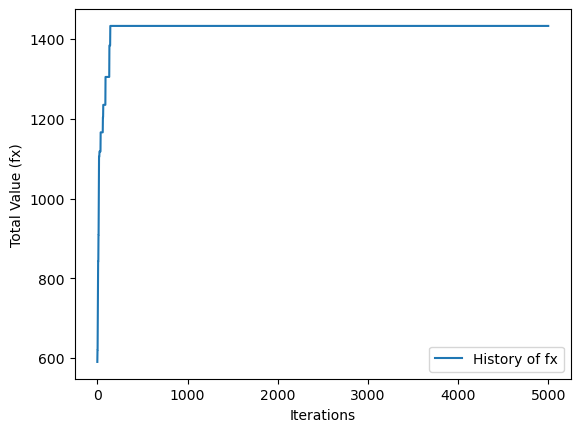

In [54]:
plt.plot(history, label='History of fx')
plt.legend()
print(f'Best value: {max(history)}')
plt.xlabel('Iterations')
plt.ylabel('Total Value (fx)');

Above plot shows the improvement of the Total Value against iterations.

<H1>Simulated Anealing </H1>

SA mataheurestics is used as an advantage over HC to escape local optimas by accepting slightly bad moves with dacaying probability.

* Initialization and Neighbor functions are similiar to those as Hill climb. 
* Added a decaying probability with parameters T and alpha.
* Keeping T=1,00,000 for every varient.

## SA With alpha = 0.999

In [55]:
def SA_algo(f, init, nbr, its):
    T=100000
    alpha=0.999
    
    x=init_fun(n)
    fx=f(x)
    bestf=fx
    history=[]
    history_bestf=[]
    
    for i in range(its):
        xnew=nbr_fun(x)
        fxnew=f(xnew)
        
        if fxnew>fx or random.random()<np.exp((fxnew-fx)/T): # Accepting all the best values and sometimes 
                                                             # disimprovemnets with decreasing probability.
            fx=fxnew
            x=xnew
            
        if fx>bestf:
            bestf=fx
        
        T*=alpha
        history.append(fx)
        history_bestf.append(bestf)
    return fx, history, history_bestf


In [56]:
%%time
fx, history, history_bestf = SA_algo( objective_function, init_fun, nbr_fun, its)

#history - includes disimprovements of fx as current fx of each iteration is appended.
#history_bestf - list of only improvements of fx.

CPU times: user 112 ms, sys: 1.71 ms, total: 114 ms
Wall time: 37.1 ms


Best value: 1321


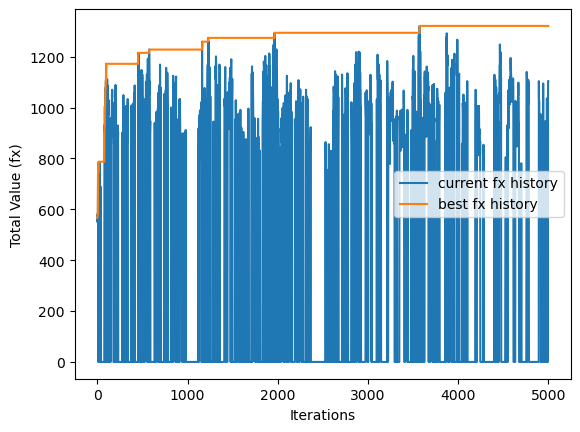

In [57]:
plt.plot(history, label='current fx history')
plt.plot(history_bestf, label= 'best fx history')
plt.legend()
print(f'Best value: {max(history)}')
plt.xlabel('Iterations')
plt.ylabel('Total Value (fx)');

### Above graph shows:
* Blue Line: Total value at each iteration (includes disimproved values as well).
* Orange Line: Only the best value found till that iteration.

### Findings:
* As we can observe that the alpha is high so the net decay of Temperature is slow, hence probability of accepting disimprovements is decreasing slowly with iterations. This can be seen as there is a high unstability in the plot above.

## SA With alpha = 0.99

In [94]:
def SA_algo_v(f, init, nbr, its):
    T=100000
    alpha=0.99
    
    x=init_fun(n)
    fx=f(x)
    bestf=fx
    history=[]
    history_bestf=[]
    
    for i in range(its):
        xnew=nbr_fun(x)
        fxnew=f(xnew)
        
        if fxnew>fx or random.random()<np.exp((fxnew-fx)/T): # Accepting all the best values and sometimes 
                                                             # disimprovemnets with decreasing probability.
            fx=fxnew
            x=xnew
            
        if fx>bestf:
            bestf=fx
        
        T*=alpha
        history.append(fx)
        history_bestf.append(bestf)
        
    return fx, history, history_bestf

In [95]:
fx_v, history_v, history_bestf_v = SA_algo_v( objective_function, init_fun, nbr_fun, its)

Best value: 1403


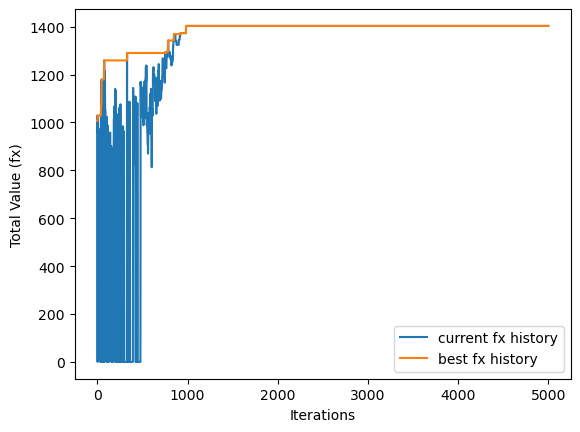

In [96]:
plt.plot(history_v, label='current fx history')
plt.plot(history_bestf_v, label= 'best fx history')
plt.legend()
print(f'Best value: {max(history_v)}')
plt.xlabel('Iterations')
plt.ylabel('Total Value (fx)');

### Findings:
* As we have changed the value of alpha to 0.99, we can see Temperature is decreasing with a faster rate than previous variation, hence we can see a better stability in the plot as probability of accepting disimprovements is decreasing with itterations at a faster rate. 

## SA With alpha = 0.9

In [61]:
def SA_algo_v2(f, init, nbr, its):
    T=100000
    alpha=0.9
    
    x=init_fun(n)
    fx=f(x)
    bestf=fx
    history=[]
    history_bestf=[]
    
    for i in range(its):
        xnew=nbr_fun(x)
        fxnew=f(xnew)
        
        if fxnew>fx or random.random()<np.exp((fxnew-fx)/T): # Accepting all the best values and sometimes 
                                                             # disimprovemnets with decreasing probability.
            fx=fxnew
            x=xnew
            
        if fx>bestf:
            bestf=fx
        
        T*=alpha
        history.append(fx)
        history_bestf.append(bestf)
        
    return fx, history, history_bestf

In [62]:
fx_v2, history_v2, history_bestf_v2 = SA_algo_v2( objective_function, init_fun, nbr_fun, its)

Best value: 1373


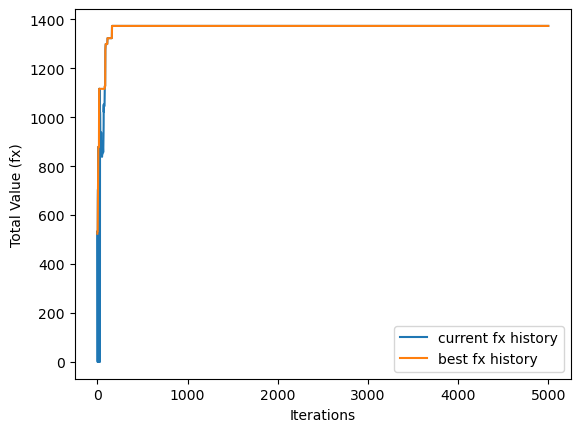

In [63]:
plt.plot(history_v2, label='current fx history')
plt.plot(history_bestf_v2, label= 'best fx history')
plt.legend()
print(f'Best value: {max(history_v2)}')
plt.xlabel('Iterations')
plt.ylabel('Total Value (fx)');

### Findings: 
* As we have changed the value of alpha to 0.9, higher than both the previous varients, we can see that the Temperature is decreasing rapidly with iterations. Hence, probability of accepting disimprovements decreased rapidly making the algorithm work like Hill climbing after some iterations.

* We can observe that current fx is following the path of best fx as disimprovements are very rarely accepted.

<H1>Genetic Algorithm</H1>

GA metaheurestics is used to escape local optimas by initializing a population of solutions than a single solution. 
* Initialization is iterated to create a population of solutions.
* Tournament between random fighters of size (3 here), winner will become the parent.
* 2 parents crossover to create 2 children
* These children will be added to the next generation's population with or without mutation depending on the probability.

# Tournament

In [64]:
def tournament(population, size):
    fighters = random.sample(population,size)
    winner = max(fighters, key=lambda i:i[0])
    return winner # Winner of the tournament with higher objective value than other fighters.

# Crossover

Used three types of crossover:
* Uniform crossover- Where each chunk of 3 bits will be chosen on random from either parents.
* One point Crossover- Where mom's and dad's chunks are interchanged from a random index.
* Two point Crossover- Where mom's and dad's chunks are interchanged from 2 random indexes.

In [65]:
def cross_uniform(dad, mom):
    boy, girl=[],[]
    
    for i in range(n): 
        if random.random()<0.5: 
            boy[i*3:i*3+3]=dad[i*3:i*3+3]
            girl[i*3:i*3+3]=mom[i*3:i*3+3]
        else:
            boy[i*3:i*3+3]=mom[i*3:i*3+3]
            girl[i*3:i*3+3]=dad[i*3:i*3+3]
    
    return boy, girl # Crossover where every bit of parents are randomly distributed to the children.
    
    
def cross_one_point(dad, mom):
    
    i = random.randrange(n)

    boy = mom[:i*3] + dad[i*3:]
    girl = dad[:i*3] + mom[i*3:]
    
    return boy, girl # Crossover where parent's genes are divided into two parts from a random index.
    
    
def cross_two_point(dad, mom):
    
    i1 = random.randrange(n)
    i2 = random.randrange(n)
    
    boy = mom[:i1*3] + dad[i1*3:i2*3] + mom[i2*3:]
    girl = dad[:i1*3] + mom[i1*3:i2*3] + dad[i2*3:]
    
    return boy, girl # Crossover where parent's genes are divided from two random indexes.

# GA Function

* Defining Iterations, population size, number of generations and probability for mutation is taken as 0.2.
* Elitism is used.

In [66]:
its=5000 # no. of iterations.
popsize = 100 # size of the population.
ngens = int(its / popsize) # generations will be iterations per population size.
pmut = 0.2 # probability of mutation.

def GA_algo(f, init, nbr, crossover, tournament, popsize, ngens, pmut):
    
    gpop=[init() for i in range(popsize)]
    history=[]
    history_elite=[]
    for z in range(ngens):
        
        gpopf=[(f(x),x) for x in gpop] # Tuple of fx and x value (to parse in tournament function)
        new_pop=[]
        
        elite_player=max((x for x in gpop), key=f) 
        new_pop.append(elite_player)  # Elitism
                    
        for i in range(popsize//2):
            p1=tournament(gpopf)[1] # Getting dad from random tournament winner.
            p2=tournament(gpopf)[1] # Getting mom from random tournament winner.
            c1,c2=crossover(p1,p2)  # Crossover of mom and dad to get children.
            
            if random.random()<pmut: # Mutation with pmut probability.
                c1=nbr(c1)
                c2=nbr(c2)
            new_pop.append(c1) # appending children to next generation population.
            new_pop.append(c2)
       
            
        history.append(max((f(x) for x in new_pop))) # Getting max value of the new population of children.
        history_elite.append(f(elite_player)) # Appending Elite player value of old population.
         
        gpop=new_pop
        
    return gpop, history, history_elite    

In [67]:
%%time

x, history, history_e = GA_algo(objective_function,
                    
                    lambda: init_fun(n),
                    nbr_fun,
                    cross_uniform,
                    lambda population: tournament(population, 3),
                    popsize,
                    ngens,
                    pmut
)
print(max(history))

1442
CPU times: user 386 ms, sys: 1.88 ms, total: 388 ms
Wall time: 127 ms


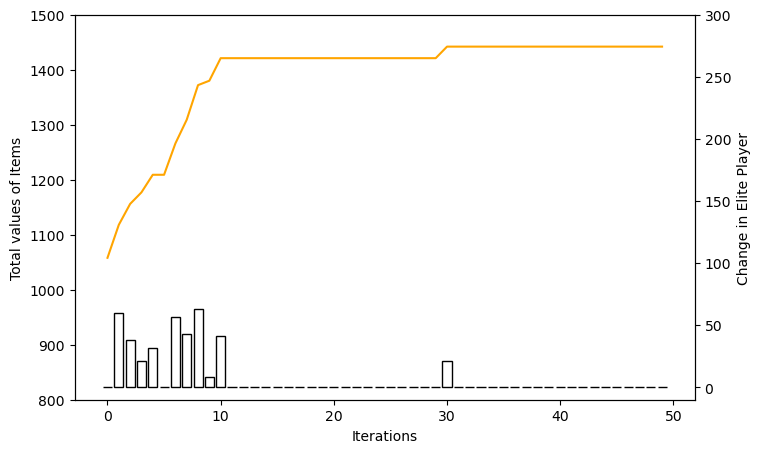

In [68]:
fig, ax1 = plt.subplots(1, figsize=(8,5))
ax2 = ax1.twinx()  # Function to plot two plots of different scales in one figure.

ax1.plot(range(50),history, c="orange")
ax1.set_ylabel('Total values of Items')
ax1.set_xlabel('Iterations')
ax1.set_ylim(800,1500)

ax2.bar(range(50),(np.array(history)-np.array(history_e)), fill=False)
ax2.set_ylabel('Change in Elite Player')
ax2.set_ylim(-10,300);

#### Plots:
* twinx() is used to create two differently scaled y-axis on the same plot.
* Line plot is used to show the best fx against iterations. 
* Bar graph is used to observe the spike in the elite player from the previous generation to the next generation.

### Findings:
* <b>We can see spikes in the bar graph in the starting iterations as the solutions are getting better at a faster rate than the later iterations as we tend to reach closer to the optima.</b>

## GA with One point crossover

This variation of Genetic Algorithm involves Crossover through one random point on the solution.
* Where one part of the child's genes comes from one parent and other part from the other parent.
* Index of random chunk is selected and then sliced the parent's genotype into two parts from that index, these parts are then appended to the children.

In [69]:
%%time
x, history, history_e = GA_algo(objective_function,
                    
                    lambda: init_fun(n),
                    nbr_fun,
                    cross_one_point,
                    lambda population: tournament(population, 3),
                    popsize,
                    ngens,
                    pmut
)
print(max(history))

1442
CPU times: user 328 ms, sys: 7.61 ms, total: 336 ms
Wall time: 114 ms


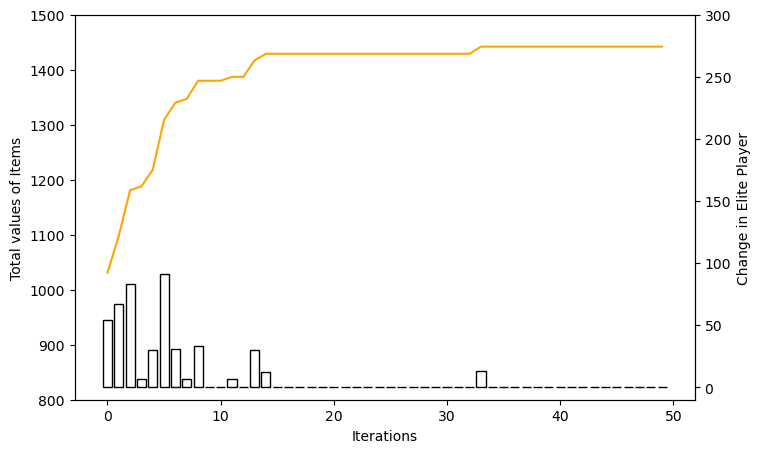

In [70]:
fig, ax1 = plt.subplots(1, figsize=(8,5))
ax2 = ax1.twinx()  # Function to plot two plots of different scales in one figure.

ax1.plot(range(50),history, c="orange")
ax1.set_ylabel('Total values of Items')
ax1.set_xlabel('Iterations')
ax1.set_ylim(800,1500)

ax2.bar(range(50),(np.array(history)-np.array(history_e)), fill=False)
ax2.set_ylabel('Change in Elite Player')
ax2.set_ylim(-10,300);

### Findings:

* Above varient's results are almost similiar to the Uniform Crossover. As we crossover through one random point, we provide more exploration than exploitation as it saves less of the parents genes than varient like two-point crossover.

## GA with Two point Crossover

In [71]:
%%time
x, history, history_e = GA_algo(objective_function,
                    
                    lambda: init_fun(n),
                    nbr_fun,
                    cross_two_point,
                    lambda population: tournament(population, 3),
                    popsize,
                    ngens,
                    pmut
)
print(f'Best Value: {max(history)}')

Best Value: 1411
CPU times: user 345 ms, sys: 1.99 ms, total: 347 ms
Wall time: 119 ms


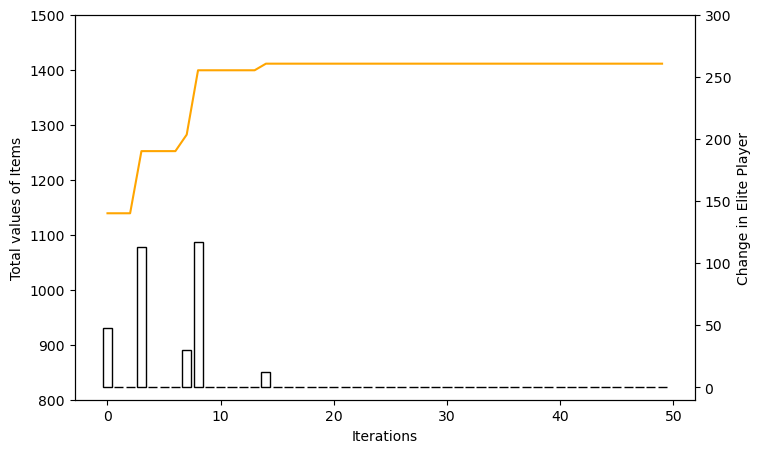

In [72]:
fig, ax1 = plt.subplots(1, figsize=(8,5))
ax2 = ax1.twinx() # Function to plot two plots of different scales in one figure.

ax1.plot(range(50),history, c="orange")
ax1.set_ylabel('Total values of Items')
ax1.set_xlabel('Iterations')
ax1.set_ylim(800,1500)

ax2.bar(range(50),(np.array(history)-np.array(history_e)), fill=False) 
ax2.set_ylabel('Change in Elite Player')
ax2.set_ylim(-10,300);

### Findings:
* In two-point Crossover, as we crossover through two random points on the solution, we tend to save more genes from the parents than above two varients, hence making this crossover more exploitative than both of the other varients.

# Performance

* Recorded performance (Total value of optimised solution) of each algorithm 5 times with random seeds.
* Created a dataframe to visualize the results.

In [73]:
%%time

HC, SA, SA_varient, SA_varient2, GA_Uniform, GA_OnePoint, GA_TwoPoint = [], [], [], [], [], [], []
its=5000

for i in range(5):
    random.seed(i)
    
    fx_hc, history_hc = HC_algo(objective_function, init_fun, nbr_fun, its)
    HC.append(fx_hc) # Best solution for HC
    
    fx_sa, history_sa, history_bestf = SA_algo( objective_function, init_fun, nbr_fun, its)
    SA.append(max(history_sa)) # Best solution for SA (alpha =0.999)
    
    fx_v, history_v, history_bestf_v = SA_algo_v( objective_function, init_fun, nbr_fun, its)
    SA_varient.append(max(history_v)) # Best solution for SA (alpha =0.99)
    
    fx_v2, history_v2, history_bestf_v2 = SA_algo_v2( objective_function, init_fun, nbr_fun, its)
    SA_varient2.append(max(history_v2)) # Best solution for SA (alpha =0.9)
    
    
    x_u, history_ga_u, history_eu = GA_algo(objective_function,
                        
                        lambda: init_fun(n),
                        nbr_fun, cross_uniform,
                        lambda population: tournament(population, 3),
                        popsize, ngens, pmut
    )
    
    x_o, history_ga_o, history_eo = GA_algo(objective_function,
                        
                        lambda: init_fun(n),
                        nbr_fun, cross_one_point,
                        lambda population: tournament(population, 3),
                        popsize, ngens, pmut
    )
    
    x_t, history_ga_t, history_et = GA_algo(objective_function,
                        
                        lambda: init_fun(n),
                        nbr_fun, cross_two_point,
                        lambda population: tournament(population, 3),
                        popsize, ngens, pmut                                              
    )
    
    GA_Uniform.append(max(history_ga_u)) # Best solution for GA (Uniform Crossover)
    GA_OnePoint.append(max(history_ga_o)) # Best solution for GA (One Point Crossover)
    GA_TwoPoint.append(max(history_ga_t)) # Best solution for GA (Two Point Crossover)


CPU times: user 2.79 s, sys: 15.8 ms, total: 2.81 s
Wall time: 2.41 s


## Results

* Created DataFrame to visualize optimum solution for 5 runs of each algos and their varients.

In [74]:
df=pd.DataFrame()
df['HC'] = HC
df['SA 0.999'] = SA
df['SA 0.99'] = SA_varient
df['SA 0.9'] = SA_varient2
df['GA Uniform'] = GA_Uniform
df['GA One Point'] = GA_OnePoint
df['GA Two Point'] = GA_TwoPoint
df

,HC,SA 0.999,SA 0.99,SA 0.9,GA Uniform,GA One Point,GA Two Point
0,1402,1269,1402,1371,1442,1442,1442
1,1306,1290,1442,1413,1433,1433,1421
2,1364,1363,1402,1402,1442,1442,1417
3,1282,1358,1405,1374,1442,1431,1442
4,1403,1285,1433,1365,1442,1442,1421


### Mean of each algorithm (High to Low)

In [75]:
df_algo=pd.DataFrame({'Algos': df.columns,
                      'Mean': list(df.mean())})
df_sorted = df_algo.sort_values(by=['Mean'], ascending= False)
df_sorted

,Algos,Mean
4,GA Uniform,1440.2
5,GA One Point,1438.0
6,GA Two Point,1428.6
2,SA 0.99,1416.8
3,SA 0.9,1385.0
0,HC,1351.4
1,SA 0.999,1313.0


## Plotted Bar graph of means

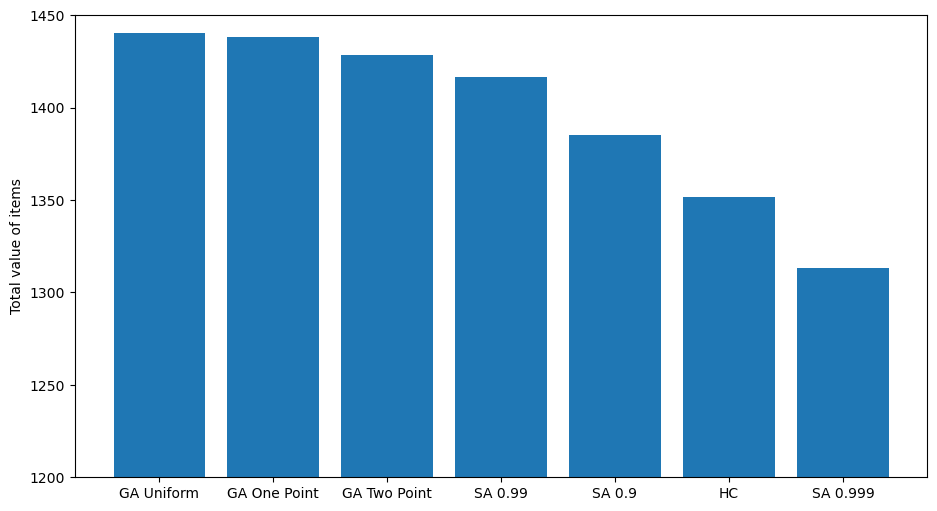

In [76]:
fig, result = plt.subplots(1,1, figsize=(11,6))
result.bar(df_sorted.Algos, df_sorted.Mean) # bar graph, x-algos, y-mean value
result.set_ylim(1200,1450);
result.set_ylabel('Total value of items');

# Conclusion

<H8> The purpose was to <b>MAXIMIZE</b> the total values of the items that can be carried in three trucks of different weight limits.

Various algorithms and their varients are implemented to get the best value of the objective function. By comprehending results of each algorithm, we came to the conclusion that :

* Genetic algorithm gives the best result, then comes the Simulated Annealing followed by Hill climbing.
    * We conclude that the **problem required more exploration than exploitation** as Uniform Crossover and One Point Crossover (which are more explorative) gave better results than Two Point Crossover (which is more exploitative as preserves most of the parents genes than other crossovers).

* Simulated annealing varients gave results depending on the value of Alpha. 
    * High value of Alpha(0.999) gave the worst result. High value made the decay slow hence the algorithm started accepting worse cases with higher probability throughout the iterations, making it worse than Hill Climbing. This varient accepts almost every neighbor either bad or good, making it a random walk case.
    * Alpha value 0.99 gave the best result compared to other SA varients as it provided better probability decay rate to accept disimprovements.
    * Alpha value 0.9 was better than Hill climb as it rarely accepts disimprovements. Due to the fast decay of Temperature parameter, it works like a Hill climb after some iterations.
    
* Hill Climbing was the least affective algorithm after SA varient with alpha 0.999, as it provides no way to escape local optimas.
</H8>

****

# Idea (Hopefully Novel)

### Plateau in a haystack
* This problem occurs when there are many invalid solutions present in the search space and the valid solutions are cornered near zero.
* To solve this problem, we can reshape the objective function by returning negative weights to the invalid solutions than giving them the death penalty.
* As we have taken chunks in the initialisation of a random solution to get a valid solution each time, we have to shape our initialization function to create a haystack of invalid solution for this problem.

Basically we have to make our function less smart to implement the idea.
* Objective function- Negative weights for crossing weight limit and Negative penalty for invalid chunk.
* Initialisation- Creating bitstring of length (items * total trucks)
* Neighbor- No change as nbr will replace the present chunk with a valid chunk.

In [77]:
def obj_fun(x):
    total_value = 0
    container_weights = [0, 0, 0]
    # truck weight limits
    weight_limits = [72, 80, 109]
    
    for i, (wt, val) in enumerate(items):
        chunk = x[i*3 : i*3+3]
        
        
        if sum(chunk) > 1:
            total_value-= 500 
            # removing death penalty and giving high penalty to every invalid chunk.
            # (higher invalid chunks, higher total negative value)
        
        elif sum(chunk) == 0:
            continue # this item is not chosen
        
        else: # if a chunk is valid (Item in only one truck) (sum(chunk)==1)
            idx = chunk.index(1)


            # Place the item in the container
            container_weights[idx] += wt
            if container_weights[idx] > weight_limits[idx]:

                # For creating a hill in Haystack for invalid solutions, 
                # giving negative weights as penalty to that invalid solution.
                total_value+= weight_limits[idx]-container_weights[idx]

            total_value += val
    
    return total_value


In [78]:
m = n*3 # len(items) * number of trucks -- to get truck index of each item.

def init_less_smart(n):
    lst=[]
    for i in range(n):
        lst.append(random.randrange(2)) # creating a random 90 size bitstring.
    return lst

print_sol(init_less_smart(m))
print(f'Total value of a random solution: {obj_fun(init_less_smart(m))}')

110 101 111 111 001 010 001 011 000 100 000 001 011 011 101 111 010 101 011 010 001 011 111 010 000 101 001 011 101 101 
Total value of a random solution: -8026


** We have successfully shaped our Objective function and init function.

## Note: 
### We dont have to change the neighbor function as it will give a neighbor which will append a valid chunk in the solution making our solution go towards the plateau.

In [79]:
def nbr_new_fun(x):
    x = x.copy()
    i= random.randrange(len(items)) # getting the index of a random chunk
    
    truck_no=[0,0,0]
    if random.random()>0.3: # probability of putting the item in none of the trucks is 30%.
        truck_no[random.randrange(3)]=1
        
    if (x[i*3:i*3+3] != truck_no): # checking if new chunk is similiar to previous.                   
        x[i*3:i*3+3] = truck_no # append new chunk if not similiar.
        return x
    else:    
        return nbr_new_fun(x) # recursion if random chunk is similiar to previous chunk.
    
print_sol(nbr_new_fun(init_less_smart(m)))

101 111 000 001 111 111 001 000 010 111 010 011 001 011 000 010 110 111 110 000 100 110 010 001 110 101 010 101 110 100 


### Hill Climbing


In [80]:
def HC_pih(f, init, nbr, its):
    x=init(m)
    fx=f(x)
    history=[]
    history_current=[]
    
    for i in range(its): # creating nbr and comapring its value, if better : moving to that solution.
        xnew=nbr(x)
        fxnew=f(xnew)
        history_current.append(fxnew) # creating list of all the nbrs.
        
        if fxnew>fx:
            x=xnew
            fx=fxnew
        history.append(fx) # creating list of the best solution of each iteration.
    return x, fx, history, history_current

In [81]:
x, fx, history, history_nbr = HC_pih(obj_fun, init_less_smart, nbr_new_fun, 5000)
print(f'The Best total Value of Items are: {fx}')
print('Best solution is :')
print_sol(x)

The Best total Value of Items are: 1444
Best solution is :
001 001 001 010 010 001 010 010 010 100 010 100 000 010 100 010 100 100 010 100 100 100 100 001 001 001 001 001 001 001 


## Plot for best value

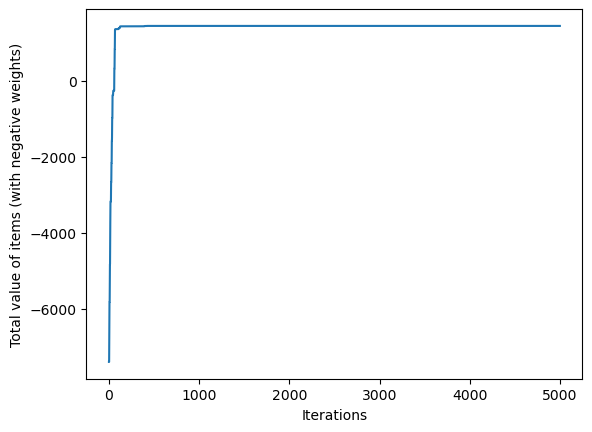

In [82]:
plt.plot(history)
plt.xlabel('Iterations')
plt.ylabel('Total value of items (with negative weights)');

## Plot for neighbor value

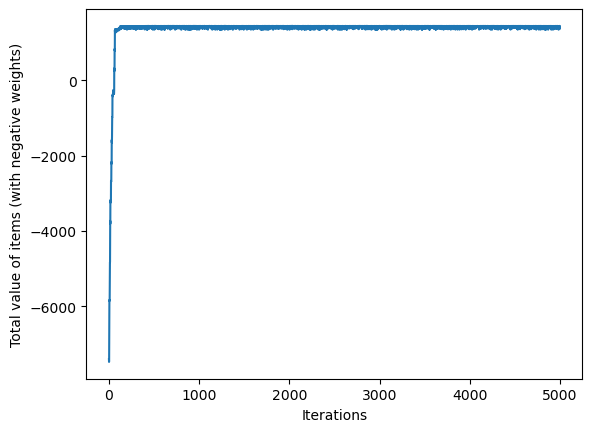

In [83]:
plt.plot(history_nbr)
plt.xlabel('Iterations')
plt.ylabel('Total value of items (with negative weights)');

## Mean and comparison with other algorithms

In [84]:
lst_x=[]
for i in range(5):
    x, fx, history, history_nbr = HC_pih(obj_fun, init_less_smart, nbr_new_fun, 1000)
    lst_x.append(fx)
    
    if i==0:
        best_value=x # Getting the best solution out of the 5 iterations.
    if fx>obj_fun(best_value):
        best_value=x

df['Plateau']= lst_x # Tabular visualisation of 5 random seeds of each algo.
df

,HC,SA 0.999,SA 0.99,SA 0.9,GA Uniform,GA One Point,GA Two Point,Plateau
0,1402,1269,1402,1371,1442,1442,1442,1444
1,1306,1290,1442,1413,1433,1433,1421,1442
2,1364,1363,1402,1402,1442,1442,1417,1444
3,1282,1358,1405,1374,1442,1431,1442,1444
4,1403,1285,1433,1365,1442,1442,1421,1444


In [85]:
df_algo=pd.DataFrame({'Algos': df.columns,
                      'Mean': list(df.mean())})
df_sorted = df_algo.sort_values(by=['Mean'], ascending= False)
df_sorted # Sorted dataframe of algos and their mean value.

,Algos,Mean
7,Plateau,1443.6
4,GA Uniform,1440.2
5,GA One Point,1438.0
6,GA Two Point,1428.6
2,SA 0.99,1416.8
3,SA 0.9,1385.0
0,HC,1351.4
1,SA 0.999,1313.0


## Findings:


* <H3>Surprisingly, HC to avoid Plateau in Haystack comes out to be better algorithm than the previously best Genetic algorithm with uniform crossover.
</H3> 
* <H3>As there is no death penalty, every overweight has a negative value making the algorithm not ignore the invalid solutions while still favouring the valid solutions. As invalid solutions are also considered which preserves the diversity, this makes the algorithm works better than the algorithms with death penalty.</H3>

In [86]:
print(f'Best solution found with value "{max(lst_x)}" is\n')
print_sol(best_value)

Best solution found with value "1444" is

001 001 010 100 001 001 010 001 100 010 001 001 000 010 100 100 001 100 010 100 100 001 100 001 010 001 001 010 010 001 


## Mapping Items with their respective Truck for the best solution

In [87]:
truck={} # Using dictionary to map Items with Trucks

for i, a in enumerate(items):
    if 1 in best_value[i*3:i*3+3]:
        truck['Item-'+ str(i+1) + str(a)]= 'Truck '+ str(best_value[i*3:i*3+3].index(1))
    else:
        truck['Item-'+ str(i+1) + str(a)]= 'None of the trucks'
truck

{'Item-1(7, 70)': 'Truck 2',
 'Item-2(13, 25)': 'Truck 2',
 'Item-3(20, 50)': 'Truck 1',
 'Item-4(4, 38)': 'Truck 0',
 'Item-5(10, 48)': 'Truck 2',
 'Item-6(4, 72)': 'Truck 2',
 'Item-7(1, 12)': 'Truck 1',
 'Item-8(5, 30)': 'Truck 2',
 'Item-9(19, 21)': 'Truck 0',
 'Item-10(1, 99)': 'Truck 1',
 'Item-11(8, 87)': 'Truck 2',
 'Item-12(14, 31)': 'Truck 2',
 'Item-13(19, 10)': 'None of the trucks',
 'Item-14(10, 67)': 'Truck 1',
 'Item-15(19, 12)': 'Truck 0',
 'Item-16(11, 50)': 'Truck 0',
 'Item-17(8, 13)': 'Truck 2',
 'Item-18(3, 68)': 'Truck 0',
 'Item-19(12, 50)': 'Truck 1',
 'Item-20(13, 41)': 'Truck 0',
 'Item-21(1, 67)': 'Truck 0',
 'Item-22(8, 98)': 'Truck 2',
 'Item-23(5, 28)': 'Truck 0',
 'Item-24(3, 15)': 'Truck 2',
 'Item-25(17, 78)': 'Truck 1',
 'Item-26(13, 83)': 'Truck 2',
 'Item-27(2, 25)': 'Truck 2',
 'Item-28(14, 79)': 'Truck 1',
 'Item-29(6, 48)': 'Truck 1',
 'Item-30(20, 49)': 'Truck 2'}

**Name: Vikrant Singh Jamwal**

**Student ID: 23104534**